__Data__ from the CIA World Factbook (https://www.cia.gov/library/publications/the-world-factbook/), a compendium of statistics about all of the countries on Earth. SQLite database "factbook.db" downloaded from GitHub repository https://github.com/factbook/factbook.sql/releases.

Description of some of the columns in the 'facts' table:
* name - The name of the country.
* area - The total land and sea area of the country.
* population - The country's population.
* population_growth- The country's population growth as a percentage.
* birth_rate - The country's birth rate, or the number of births a year per 1,000 people.
* death_rate - The country's death rate, or the number of death a year per 1,000 people.
* area- The country's total area (both land and water).
* area_land - The country's land area in square kilometers.
* area_water - The country's waterarea in square kilometers.

In [2]:
# show plots inline
%matplotlib inline 

# load libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# connect to database
conn = sqlite3.connect("factbook.db")

In [4]:
# query: find table name
q1 = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [5]:
# query the non-pandas way
cursor = conn.cursor()
cursor.execute(q1).fetchall()

[('table',
  'facts',
  'facts',
  2,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float, "created_at" datetime, "updated_at" datetime)'),
 ('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)')]

In [6]:
# query: list first rows in table
q2 = "SELECT * FROM facts LIMIT 5;"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [7]:
# query: any country with higher death rate than birth rate + 3?
q4 = "SELECT * FROM facts WHERE death_rate > birth_rate + 3;"
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,26,bu,Bulgaria,110879,108489,2390,7186893,0.58,8.92,14.44,0.29,2015-11-01 13:21:52.018824,2015-11-01 13:21:52.018824
1,75,hu,Hungary,93028,89608,3420,9897541,0.22,9.16,12.73,1.33,2015-11-01 13:26:14.152686,2015-11-01 13:26:14.152686
2,96,lg,Latvia,64589,62249,2340,1986705,1.06,10.00,14.31,6.26,2015-11-01 13:28:02.736587,2015-11-01 13:28:02.736587
3,102,lh,Lithuania,65300,62680,2620,2884433,1.04,10.10,14.27,6.27,2015-11-01 13:28:31.246995,2015-11-01 13:28:31.246995
4,153,ri,Serbia,77474,77474,0,7176794,0.46,9.08,13.66,0.00,2015-11-01 13:32:35.153698,2015-11-01 13:32:35.153698
5,183,up,Ukraine,603550,579330,24220,44429471,0.60,10.72,14.46,2.25,2015-11-01 13:34:59.087093,2015-11-01 13:34:59.087093


Looks like Latvia and Lithuania (which are neighboring countries) have a much higher death than birth rate. At the same time, they have a rather high migration rate. Are these maybe favored immigration or retirement destinations so people move there and die there, but were accounted for birth in a different country?

In [8]:
# summary statistics
q3 = "select min(population) min_population, max(population) max_population, min(population_growth) min_population_growth, max(population_growth) max_population_growth from facts"
pd.read_sql_query(q3, conn)

,min_population,max_population,min_population_growth,max_population_growth
0,0,7256490011,0.0,4.02


In [9]:
# check population outlier
q5 = "SELECT * FROM facts WHERE (population == 0) OR (population > 7000000000);"
pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000.0,None,0,NaN,NaN,NaN,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746
1,261,xx,World,None,NaN,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


Nobody is accounted for as 'population' in Antarctica (see CIA Factbook page on Antarctica for more details, https://www.cia.gov/library/publications/the-world-factbook/geos/ay.html). World is included as country. Nobody seems to have moved to Antarctica or our planet Earth according to this databse. Also, globaly the birth rate is higher than the death rate, leading to an overall world population growths.

In [10]:
# doing another query: how many countries have larger death rate than birth rate?
# test for not-NAN entries: Adding anything to NAN equals NAN (x+1 == x if x is NAN)
# use HAVING istead of WHERE when referring to named columns generated during query itself
q6 = '''SELECT COUNT(name) as n_countries, SUM(death_rate) / COUNT(death_rate) as mean_death_rate, SUM(birth_rate) / COUNT(birth_rate) as mean_birth_rate, death_rate > birth_rate as death_larger_birth FROM facts
        GROUP BY death_larger_birth
        HAVING death_larger_birth + 1 != death_larger_birth
        '''
pd.read_sql_query(q6, conn)

,n_countries,mean_death_rate,mean_birth_rate,death_larger_birth
0,204,7.352941,20.501569,0
1,24,11.802083,9.357917,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fe92240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10ff395f8>]], dtype=object)

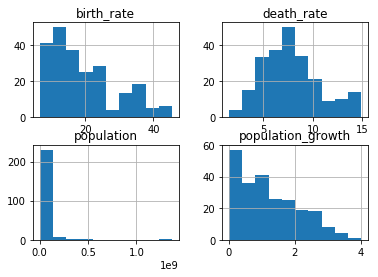

In [11]:
# generate histograms (ignoring Antarctica and The World)
q7 = '''SELECT population, population_growth, birth_rate, death_rate from facts
        WHERE (population > 0) AND (population < 7000000000);'''
pd.read_sql_query(q7, conn).hist()

/usr/local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10fe921d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11050d438>]], dtype=object)

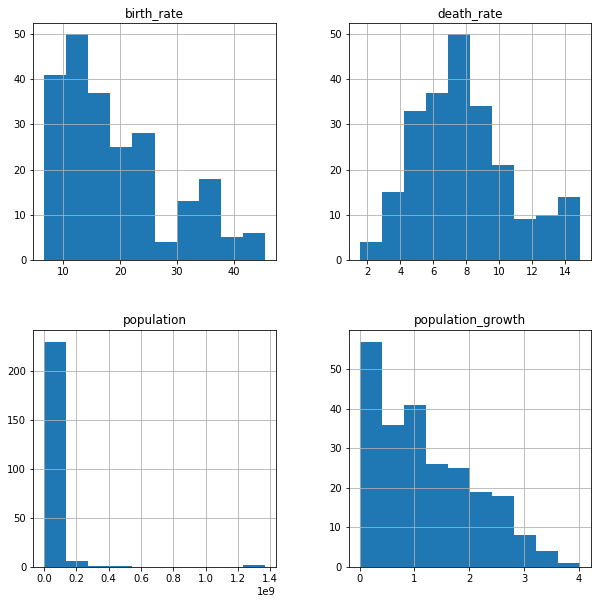

In [12]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q8 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts);
'''
pd.read_sql_query(q8, conn).hist(ax=ax)

In [13]:
q9 = "select name, cast(population as float)/cast(area as float) density from facts order by density desc limit 20"
pd.read_sql_query(q9, conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


### Further steps:
    
* Which countries have the highest population density? Population density is the ratio of population to land area. Compare your results with those from Wikipedia.
* Generate a histogram of population densities.
* Which countries have the highest ratios of water to land? Which countries have more water than land?
* Correlations between population density and birth / death / migration rates?
* Add another table to the database and use cross-references between those tables